
# 🌍 Air Quality Prediction and Classification using Machine Learning

### 📘 Overview
This project analyzes air quality data to predict and classify the **Air Quality Index (AQI)** using various **machine learning models**.  
It covers **data preprocessing**, **EDA**, **regression**, and **classification** to understand pollution patterns and identify key pollutants affecting AQI.

### 🎯 Objectives
- Predict AQI values using regression models  
- Classify AQI levels as *Good*, *Moderate*, or *Poor*  
- Compare model performance using evaluation metrics  
- Gain insights into the relationship between pollutants and AQI

### 🧠 Techniques Used
- **Libraries:** pandas, numpy, matplotlib, seaborn, scikit-learn  
- **Models:** Linear Regression, Random Forest, Gradient Boosting, SVM, KNN  
- **Metrics:** R², RMSE, Accuracy, F1-score  

### ✅ Outcome
A complete end-to-end analysis to forecast AQI levels and categorize air quality effectively.
"""

display(Markdown(project_intro))


Saving air quality data.csv to air quality data.csv
✅ Data Loaded Successfully!

Shape of dataset: (29531, 14)

Columns:
 ['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

Data Types:
 City        object
PM2.5      float64
PM10       float64
NO         float64
NO2        float64
NOx        float64
NH3        float64
CO         float64
SO2        float64
O3         float64
Benzene    float64
Toluene    float64
Xylene     float64
AQI        float64
dtype: object

Missing Values:
 City           0
PM2.5       4598
PM10       11140
NO          3582
NO2         3585
NOx         4185
NH3        10328
CO          2059
SO2         3854
O3          4022
Benzene     5623
Toluene     8041
Xylene     18109
AQI         4681
dtype: int64

Statistical Summary:
               PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    

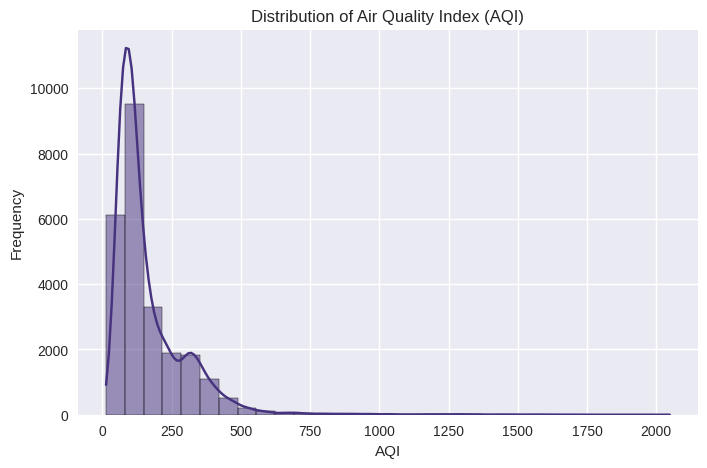

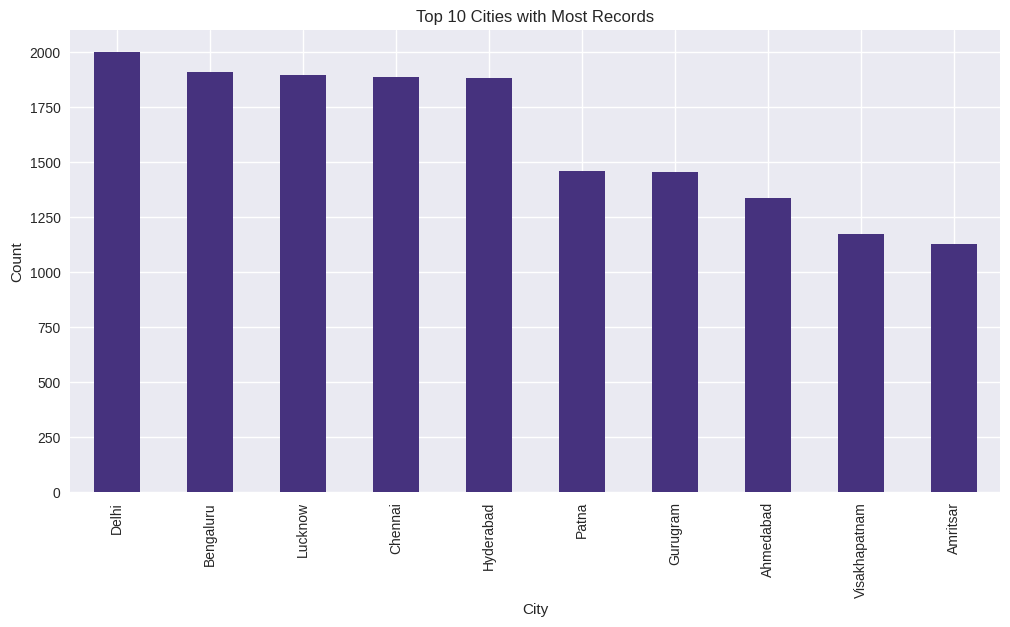

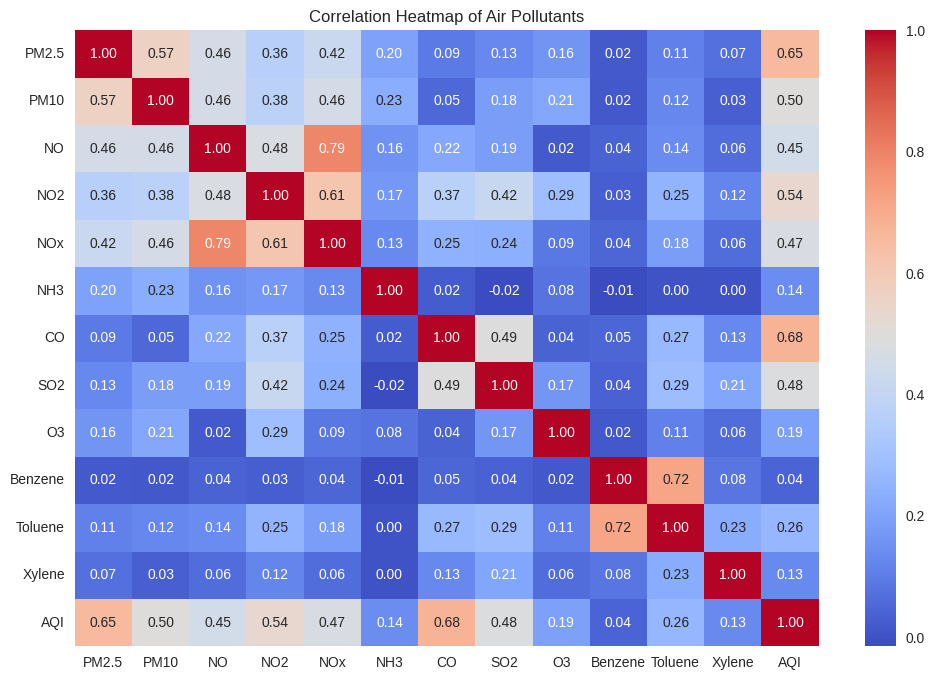

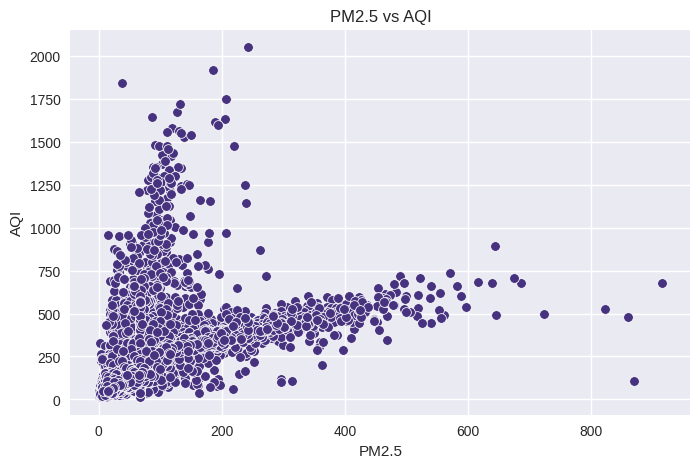

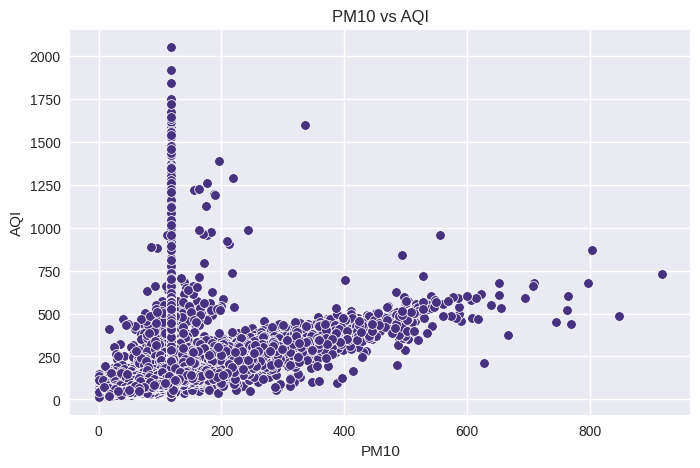

/tmp/ipython-input-2494815378.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_aqi.index, y=city_aqi.values, palette='plasma')


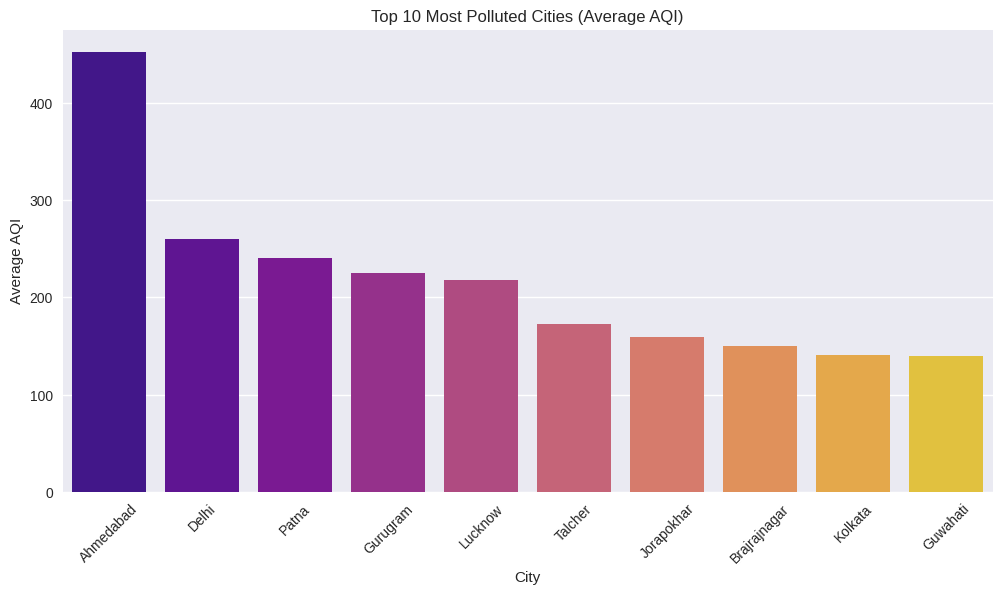

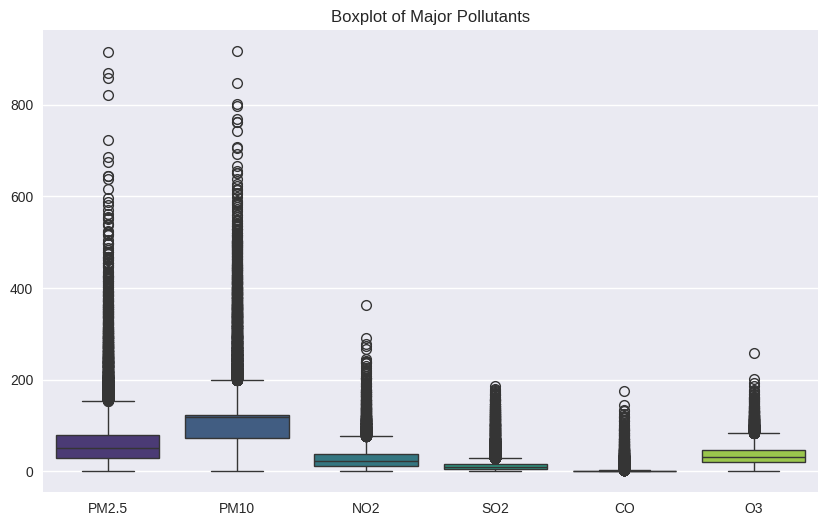

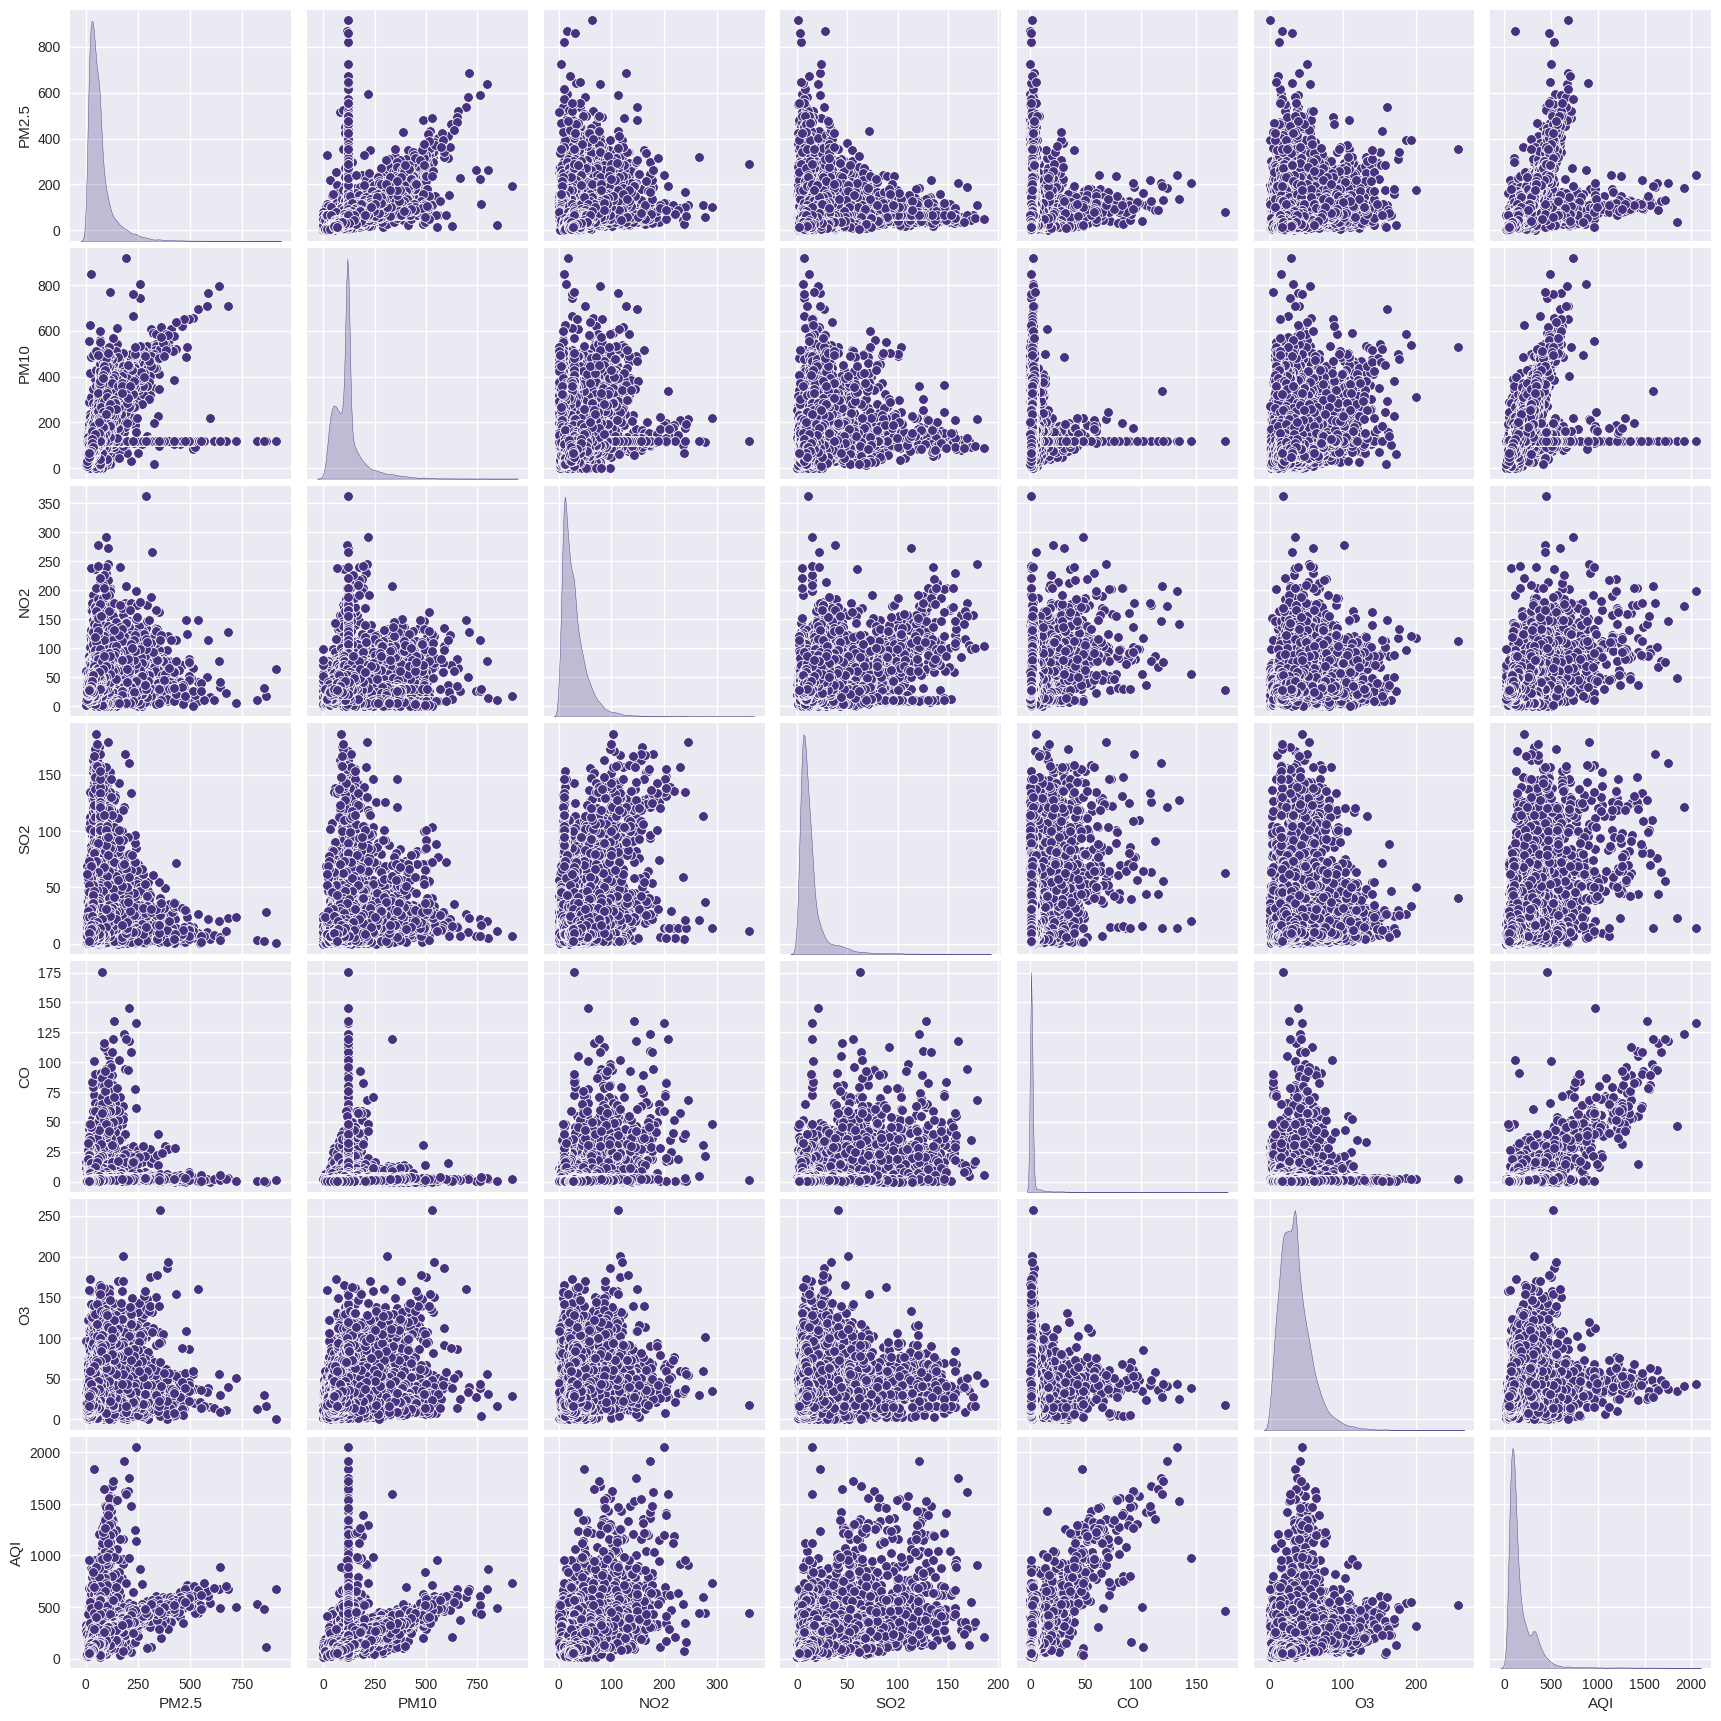

🔹 Insights:
1. Dataset covers multiple Indian cities with varying air pollution levels.
2. AQI is strongly correlated with PM2.5 and PM10 concentrations.
3. Some cities have consistently higher AQI levels (potential hotspots).
4. Outliers exist in PM2.5 and PM10 — typical in high pollution events.
5. Missing values were handled by mean imputation for numerical columns.


In [ ]:
# ==========================================
# STEP 1: Import Libraries
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better visuals
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')

# ==========================================
# STEP 2: Load Dataset
# ==========================================
from google.colab import files
uploaded = files.upload()  # Upload your 'air quality data.csv' file

df = pd.read_csv('air quality data.csv')
print("✅ Data Loaded Successfully!\n")

# ==========================================
# STEP 3: Basic Exploration
# ==========================================
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())

# Display first 5 rows
df.head()

# ==========================================
# STEP 4: Data Cleaning
# ==========================================
# Handle missing values - optional strategies
df = df.dropna(subset=['AQI'])  # Drop rows without AQI
df.fillna(df.mean(numeric_only=True), inplace=True)

# Check again
print("\nMissing values after cleaning:\n", df.isnull().sum())

# ==========================================
# STEP 5: Univariate Analysis
# ==========================================
# Distribution of AQI
plt.figure(figsize=(8,5))
sns.histplot(df['AQI'], kde=True, bins=30)
plt.title('Distribution of Air Quality Index (AQI)')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

# Count of records by city
plt.figure(figsize=(12,6))
df['City'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Cities with Most Records')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

# ==========================================
# STEP 6: Bivariate Analysis
# ==========================================
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Air Pollutants')
plt.show()

# AQI vs PM2.5 scatter
plt.figure(figsize=(8,5))
sns.scatterplot(x='PM2.5', y='AQI', data=df)
plt.title('PM2.5 vs AQI')
plt.show()

# AQI vs PM10
plt.figure(figsize=(8,5))
sns.scatterplot(x='PM10', y='AQI', data=df)
plt.title('PM10 vs AQI')
plt.show()

# ==========================================
# STEP 7: City-wise AQI Analysis
# ==========================================
city_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=city_aqi.index, y=city_aqi.values, palette='plasma')
plt.title('Top 10 Most Polluted Cities (Average AQI)')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)
plt.show()

# ==========================================
# STEP 8: Outlier Detection
# ==========================================
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']])
plt.title('Boxplot of Major Pollutants')
plt.show()

# ==========================================
# STEP 9: Pairplot for Correlation
# ==========================================
sns.pairplot(df[['PM2.5','PM10','NO2','SO2','CO','O3','AQI']], diag_kind='kde')
plt.show()

# ==========================================
# STEP 10: Key Insights
# ==========================================
print("🔹 Insights:")
print("1. Dataset covers multiple Indian cities with varying air pollution levels.")
print("2. AQI is strongly correlated with PM2.5 and PM10 concentrations.")
print("3. Some cities have consistently higher AQI levels (potential hotspots).")
print("4. Outliers exist in PM2.5 and PM10 — typical in high pollution events.")
print("5. Missing values were handled by mean imputation for numerical columns.")


In [ ]:
# ==========================================
# STEP 1: Import Libraries
# ==========================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ==========================================
# STEP 2: Load and Prepare Data
# ==========================================
df = pd.read_csv('air quality data.csv')
df = df.dropna(subset=['AQI'])
df.fillna(df.mean(numeric_only=True), inplace=True)

# Numeric & categorical columns
num_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
cat_col = ['City']

# Encode city
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])

In [ ]:
# ==========================================
# STEP 3: Regression Models
# ==========================================
X = df[num_cols + cat_col]
y = df['AQI']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models
regressors = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN Regressor": KNeighborsRegressor()
}

reg_results = []

for name, model in regressors.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    reg_results.append({"Model": name, "R2": r2, "RMSE": rmse})

reg_df = pd.DataFrame(reg_results).sort_values(by="R2", ascending=False)
print("📊 Regression Model Comparison:")
print(reg_df)

📊 Regression Model Comparison:
               Model        R2       RMSE
3      Random Forest  0.911786  40.190671
4  Gradient Boosting  0.897161  43.394633
6      KNN Regressor  0.874014  48.030474
2   Lasso Regression  0.810081  58.971316
1   Ridge Regression  0.809210  59.106343
0  Linear Regression  0.809200  59.107865
5                SVR  0.654170  79.577009



📘 Model: Linear Regression
R² Score: 0.8092
RMSE: 59.1079
MAE: 31.1877



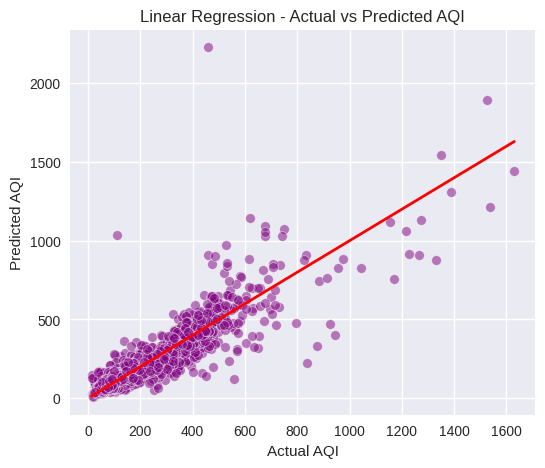

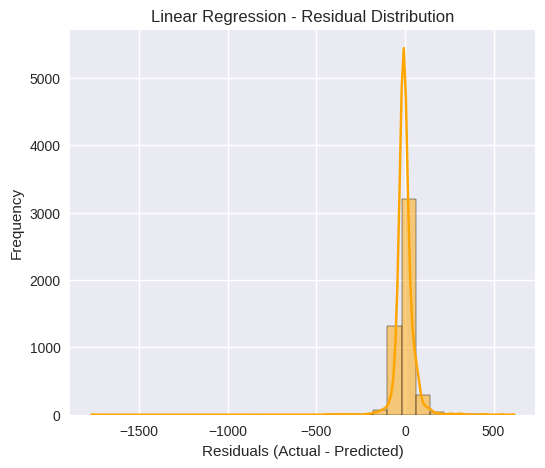


📘 Model: Ridge Regression
R² Score: 0.8092
RMSE: 59.1063
MAE: 31.1880



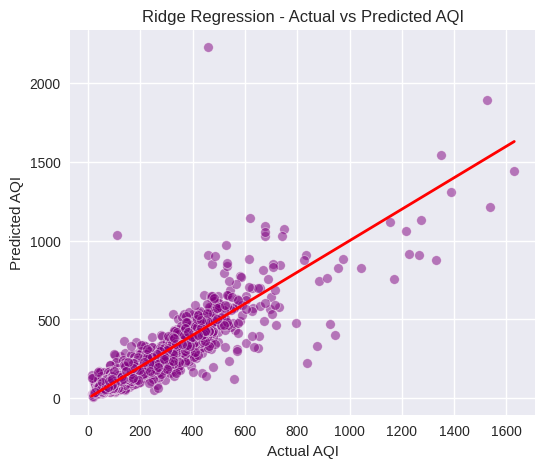

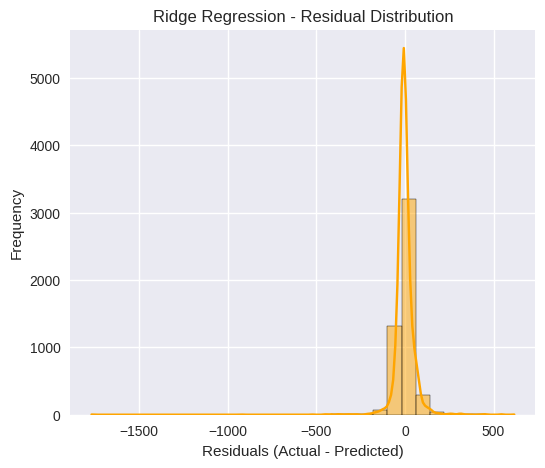


📘 Model: Lasso Regression
R² Score: 0.8101
RMSE: 58.9713
MAE: 31.2309



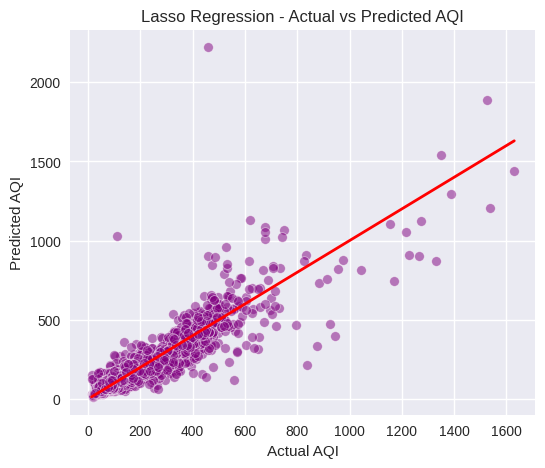

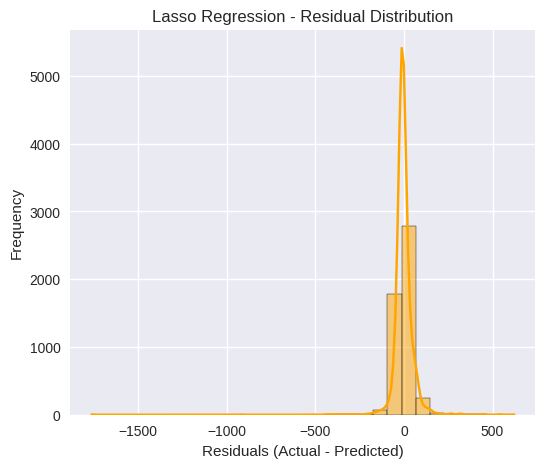


📘 Model: Random Forest
R² Score: 0.9118
RMSE: 40.1907
MAE: 20.5137



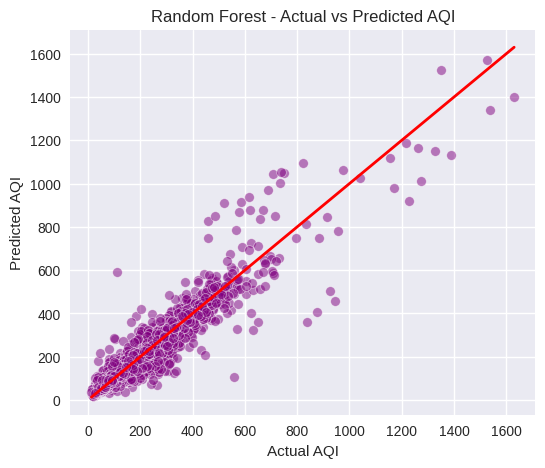

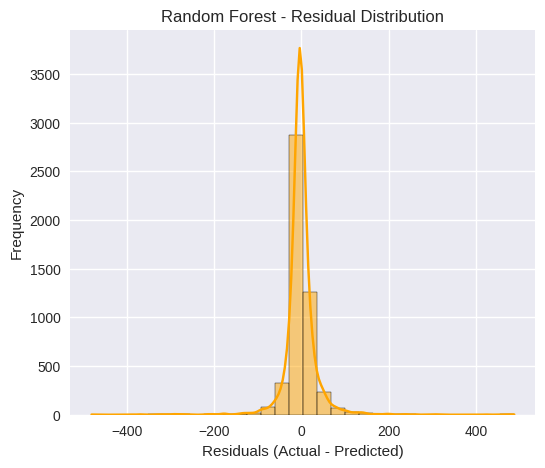


📘 Model: Gradient Boosting
R² Score: 0.8972
RMSE: 43.3946
MAE: 23.5416



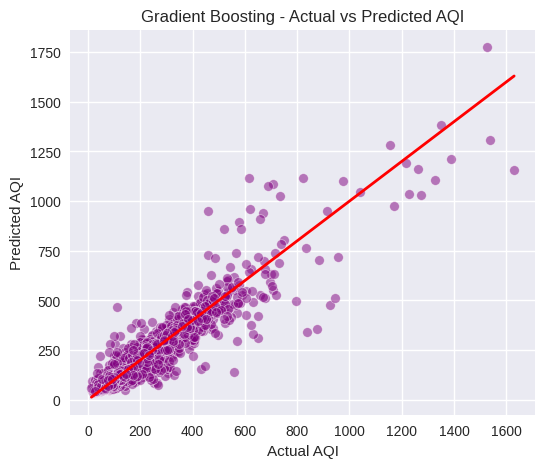

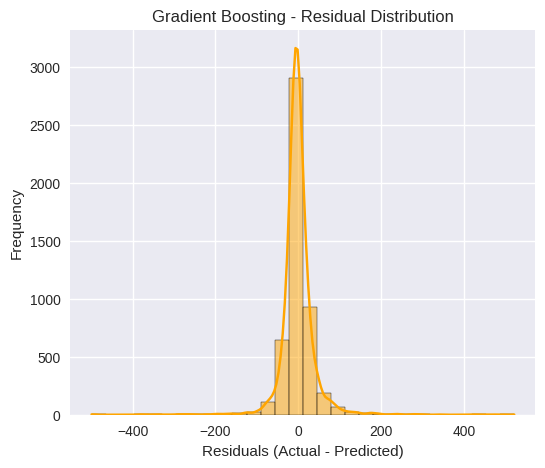


📘 Model: SVR
R² Score: 0.6542
RMSE: 79.5770
MAE: 34.0758



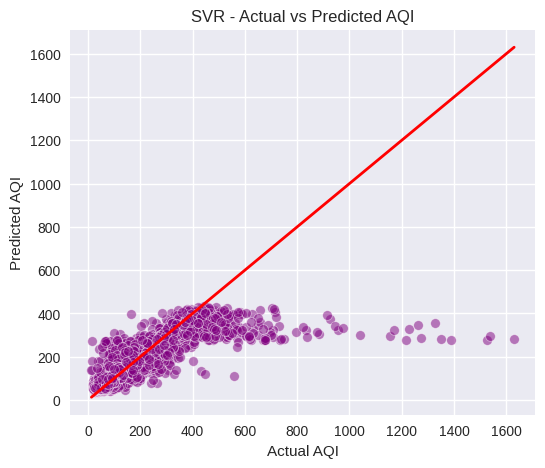

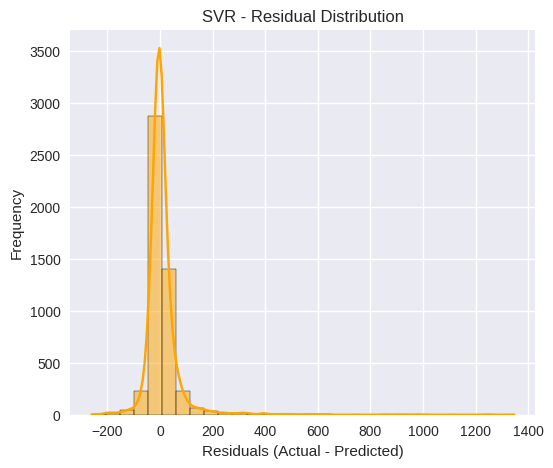


📘 Model: KNN Regressor
R² Score: 0.8740
RMSE: 48.0305
MAE: 23.9649



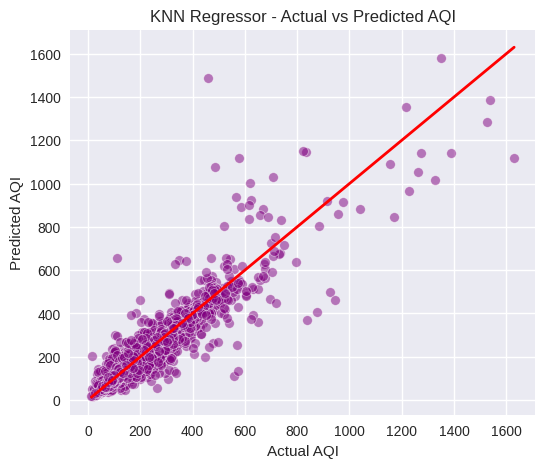

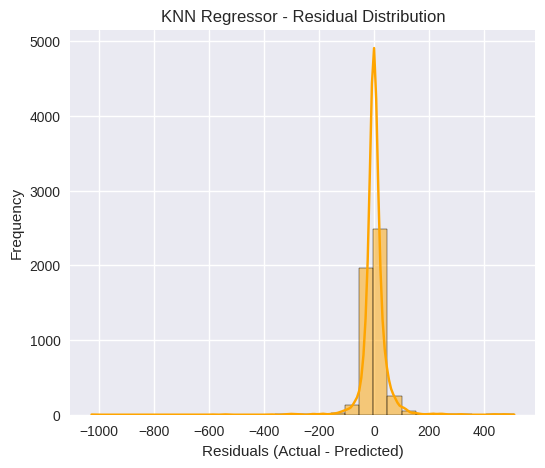

/tmp/ipython-input-1987372205.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2', y='Model', data=reg_df, palette='viridis')


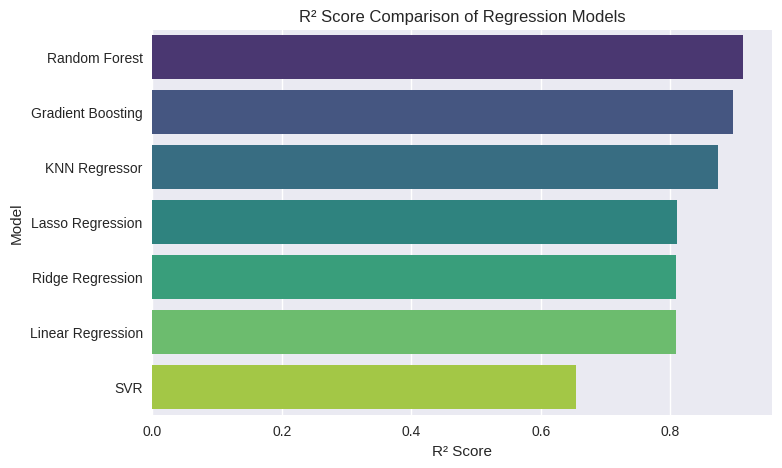

/tmp/ipython-input-1987372205.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=reg_df, palette='mako')


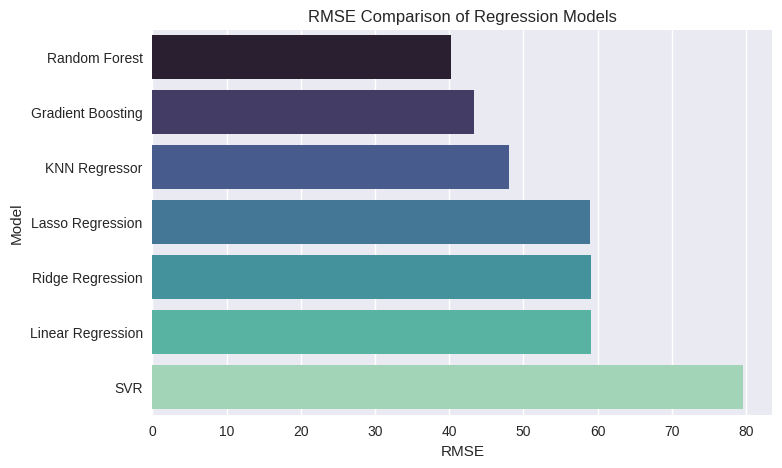

🏆 Best Performing Regression Model: Random Forest
✅ Based on highest R² score and lowest RMSE.
🧠 This model best captures the relationship between pollutants and AQI.


In [ ]:
# ==========================================
# STEP 3A: Detailed Regression Model Evaluation
# ==========================================
import matplotlib.pyplot as plt
import seaborn as sns

# Function to evaluate each model in detail
def evaluate_regression_model(name, model, X_test, y_test):
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = np.mean(np.abs(y_test - preds))

    print(f"\n===============================")
    print(f"📘 Model: {name}")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print("===============================\n")

    # Actual vs Predicted Scatter Plot
    plt.figure(figsize=(6,5))
    sns.scatterplot(x=y_test, y=preds, alpha=0.5, color='purple')
    plt.title(f"{name} - Actual vs Predicted AQI")
    plt.xlabel("Actual AQI")
    plt.ylabel("Predicted AQI")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
    plt.show()

    # Residual Plot
    residuals = y_test - preds
    plt.figure(figsize=(6,5))
    sns.histplot(residuals, bins=30, kde=True, color='orange')
    plt.title(f"{name} - Residual Distribution")
    plt.xlabel("Residuals (Actual - Predicted)")
    plt.ylabel("Frequency")
    plt.show()

# Evaluate each regression model
for name, model in regressors.items():
    evaluate_regression_model(name, model, X_test, y_test)

# ==========================================
# STEP 3B: Summary Visualization of All Models
# ==========================================
# Bar plot for R² comparison
plt.figure(figsize=(8,5))
sns.barplot(x='R2', y='Model', data=reg_df, palette='viridis')
plt.title('R² Score Comparison of Regression Models')
plt.xlabel('R² Score')
plt.ylabel('Model')
plt.show()

# Bar plot for RMSE comparison
plt.figure(figsize=(8,5))
sns.barplot(x='RMSE', y='Model', data=reg_df, palette='mako')
plt.title('RMSE Comparison of Regression Models')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.show()

# ==========================================
# STEP 3C: Summary Interpretation
# ==========================================
best_model = reg_df.iloc[0]['Model']
print(f"🏆 Best Performing Regression Model: {best_model}")
print("✅ Based on highest R² score and lowest RMSE.")
print("🧠 This model best captures the relationship between pollutants and AQI.")



📈 Classification Model Comparison:
                 Model  Accuracy
1        Random Forest  0.879276
2    Gradient Boosting  0.873239
3                  SVM  0.856942
4                  KNN  0.847082
0  Logistic Regression  0.835412


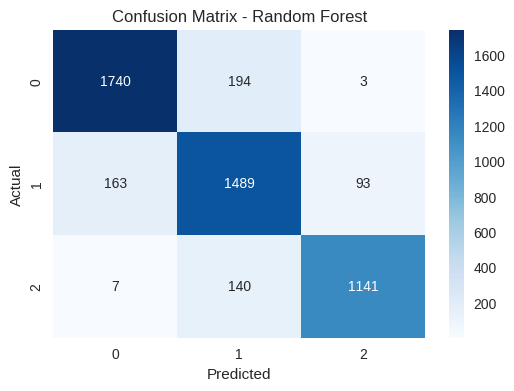


Classification Report for Best Model:

              precision    recall  f1-score   support

        Good       0.91      0.90      0.90      1937
    Moderate       0.82      0.85      0.83      1745
        Poor       0.92      0.89      0.90      1288

    accuracy                           0.88      4970
   macro avg       0.88      0.88      0.88      4970
weighted avg       0.88      0.88      0.88      4970



In [ ]:
# ==========================================
# STEP 4: Classification Models
# ==========================================
# Create AQI Category (Good, Moderate, Poor)
def categorize_aqi(aqi):
    if aqi <= 100:
        return 0  # Good
    elif aqi <= 200:
        return 1  # Moderate
    else:
        return 2  # Poor

df['AQI_Class'] = df['AQI'].apply(categorize_aqi)

X_cls = df[num_cols + cat_col]
y_cls = df['AQI_Class']

X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

cls_results = []

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    cls_results.append({"Model": name, "Accuracy": acc})

cls_df = pd.DataFrame(cls_results).sort_values(by="Accuracy", ascending=False)
print("\n📈 Classification Model Comparison:")
print(cls_df)

# Confusion matrix for best classifier
best_cls = classifiers[cls_df.iloc[0]['Model']]
preds_best = best_cls.predict(X_test)

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, preds_best), annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {cls_df.iloc[0]['Model']}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report for Best Model:\n")
print(classification_report(y_test, preds_best, target_names=['Good', 'Moderate', 'Poor']))



📘 Model: Logistic Regression
Accuracy:  0.8354
Precision: 0.8388
Recall:    0.8354
F1 Score:  0.8365



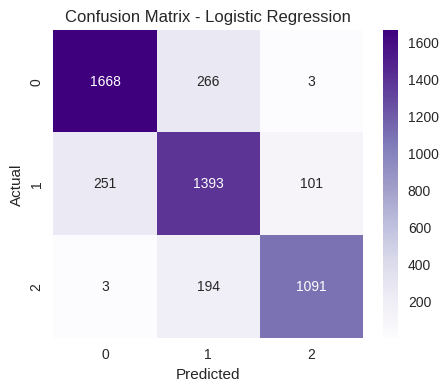

Classification Report - Logistic Regression
              precision    recall  f1-score   support

        Good       0.87      0.86      0.86      1937
    Moderate       0.75      0.80      0.77      1745
        Poor       0.91      0.85      0.88      1288

    accuracy                           0.84      4970
   macro avg       0.84      0.84      0.84      4970
weighted avg       0.84      0.84      0.84      4970


📘 Model: Random Forest
Accuracy:  0.8811
Precision: 0.8830
Recall:    0.8811
F1 Score:  0.8817



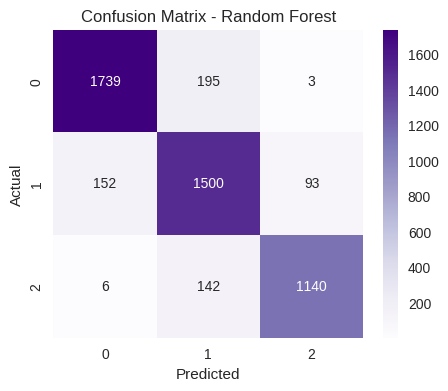

Classification Report - Random Forest
              precision    recall  f1-score   support

        Good       0.92      0.90      0.91      1937
    Moderate       0.82      0.86      0.84      1745
        Poor       0.92      0.89      0.90      1288

    accuracy                           0.88      4970
   macro avg       0.89      0.88      0.88      4970
weighted avg       0.88      0.88      0.88      4970


📘 Model: Gradient Boosting
Accuracy:  0.8732
Precision: 0.8747
Recall:    0.8732
F1 Score:  0.8738



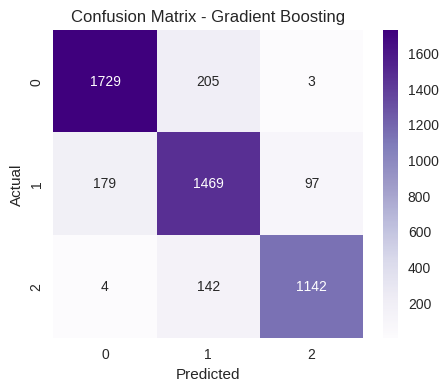

Classification Report - Gradient Boosting
              precision    recall  f1-score   support

        Good       0.90      0.89      0.90      1937
    Moderate       0.81      0.84      0.83      1745
        Poor       0.92      0.89      0.90      1288

    accuracy                           0.87      4970
   macro avg       0.88      0.87      0.88      4970
weighted avg       0.87      0.87      0.87      4970


📘 Model: SVM
Accuracy:  0.8569
Precision: 0.8579
Recall:    0.8569
F1 Score:  0.8573



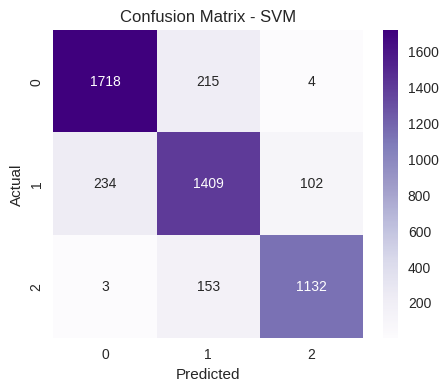

Classification Report - SVM
              precision    recall  f1-score   support

        Good       0.88      0.89      0.88      1937
    Moderate       0.79      0.81      0.80      1745
        Poor       0.91      0.88      0.90      1288

    accuracy                           0.86      4970
   macro avg       0.86      0.86      0.86      4970
weighted avg       0.86      0.86      0.86      4970


📘 Model: KNN
Accuracy:  0.8471
Precision: 0.8482
Recall:    0.8471
F1 Score:  0.8473



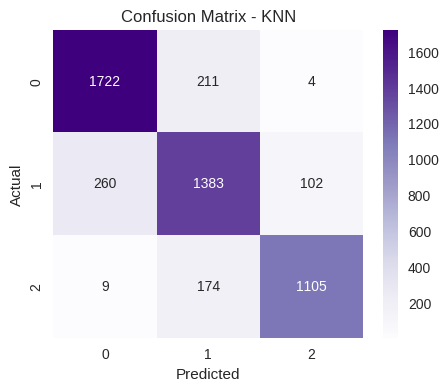

Classification Report - KNN
              precision    recall  f1-score   support

        Good       0.86      0.89      0.88      1937
    Moderate       0.78      0.79      0.79      1745
        Poor       0.91      0.86      0.88      1288

    accuracy                           0.85      4970
   macro avg       0.85      0.85      0.85      4970
weighted avg       0.85      0.85      0.85      4970



/tmp/ipython-input-3204171897.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=cls_detailed_df, palette='viridis')


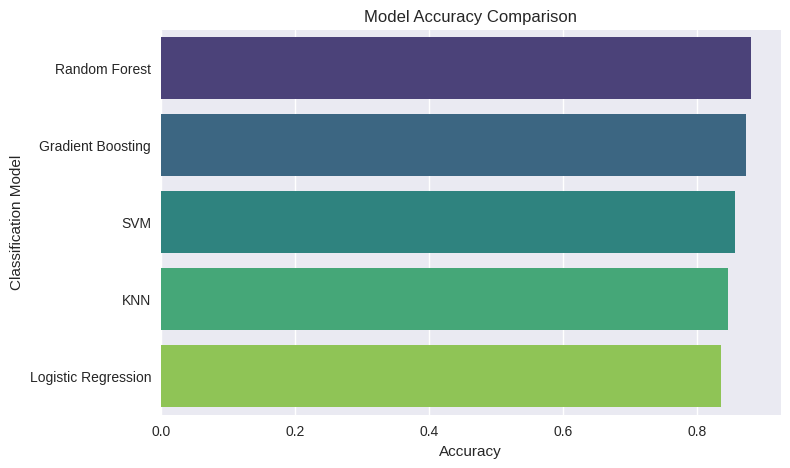

/tmp/ipython-input-3204171897.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F1', y='Model', data=cls_detailed_df, palette='mako')


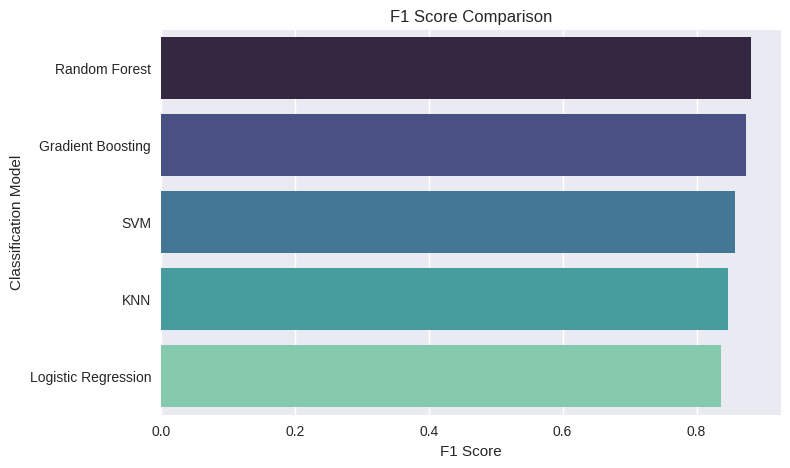

🏆 Best Performing Classification Model: Random Forest
✅ Based on highest Accuracy and F1 Score.
🧠 This model best predicts AQI categories (Good, Moderate, Poor).

📊 Classification Model Comparison Table:

                 Model  Accuracy  Precision    Recall        F1
0        Random Forest  0.881087   0.882999  0.881087  0.881711
1    Gradient Boosting  0.873239   0.874742  0.873239  0.873784
2                  SVM  0.856942   0.857853  0.856942  0.857276
3                  KNN  0.847082   0.848202  0.847082  0.847348
4  Logistic Regression  0.835412   0.838780  0.835412  0.836526


In [ ]:
# ==========================================
# STEP 4A: Detailed Classification Evaluation
# ==========================================
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_classification_model(name, model, X_test, y_test):
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted')
    rec = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')

    print(f"\n===============================")
    print(f"📘 Model: {name}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print("===============================\n")

    # Confusion Matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Purples')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Classification Report
    print(f"Classification Report - {name}")
    print(classification_report(y_test, preds, target_names=['Good', 'Moderate', 'Poor']))

# Evaluate all models
cls_detailed_results = []
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted')
    rec = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')
    cls_detailed_results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1
    })
    evaluate_classification_model(name, model, X_test, y_test)

cls_detailed_df = pd.DataFrame(cls_detailed_results).sort_values(by="Accuracy", ascending=False)

# ==========================================
# STEP 4B: Summary Visualization of All Models
# ==========================================
plt.figure(figsize=(8,5))
sns.barplot(x='Accuracy', y='Model', data=cls_detailed_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Classification Model')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='F1', y='Model', data=cls_detailed_df, palette='mako')
plt.title('F1 Score Comparison')
plt.xlabel('F1 Score')
plt.ylabel('Classification Model')
plt.show()

# ==========================================
# STEP 4C: Summary Interpretation
# ==========================================
best_cls_model = cls_detailed_df.iloc[0]['Model']
print("🏆 Best Performing Classification Model:", best_cls_model)
print("✅ Based on highest Accuracy and F1 Score.")
print("🧠 This model best predicts AQI categories (Good, Moderate, Poor).")

print("\n📊 Classification Model Comparison Table:\n")
print(cls_detailed_df.reset_index(drop=True))


📘 REGRESSION PERFORMANCE SUMMARY


,Model,R2,RMSE
0,Random Forest,0.911786,40.190671
1,Gradient Boosting,0.897161,43.394633
2,KNN Regressor,0.874014,48.030474
3,Lasso Regression,0.810081,58.971316
4,Ridge Regression,0.809210,59.106343
5,Linear Regression,0.809200,59.107865
6,SVR,0.654170,79.577009



🏆 Best Regression Model: Random Forest
🔹 R² Score: 0.9118
🔹 RMSE: 40.1907

📗 CLASSIFICATION PERFORMANCE SUMMARY


,Model,Accuracy,Precision,Recall,F1
0,Random Forest,0.881087,0.882999,0.881087,0.881711
1,Gradient Boosting,0.873239,0.874742,0.873239,0.873784
2,SVM,0.856942,0.857853,0.856942,0.857276
3,KNN,0.847082,0.848202,0.847082,0.847348
4,Logistic Regression,0.835412,0.838780,0.835412,0.836526



🏆 Best Classification Model: Random Forest
🔹 Accuracy: 0.8811
🔹 F1 Score: 0.8817


/tmp/ipython-input-1321654573.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2', y='Model', data=reg_df, ax=axes[0], palette='viridis')
/tmp/ipython-input-1321654573.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=cls_detailed_df, ax=axes[1], palette='mako')


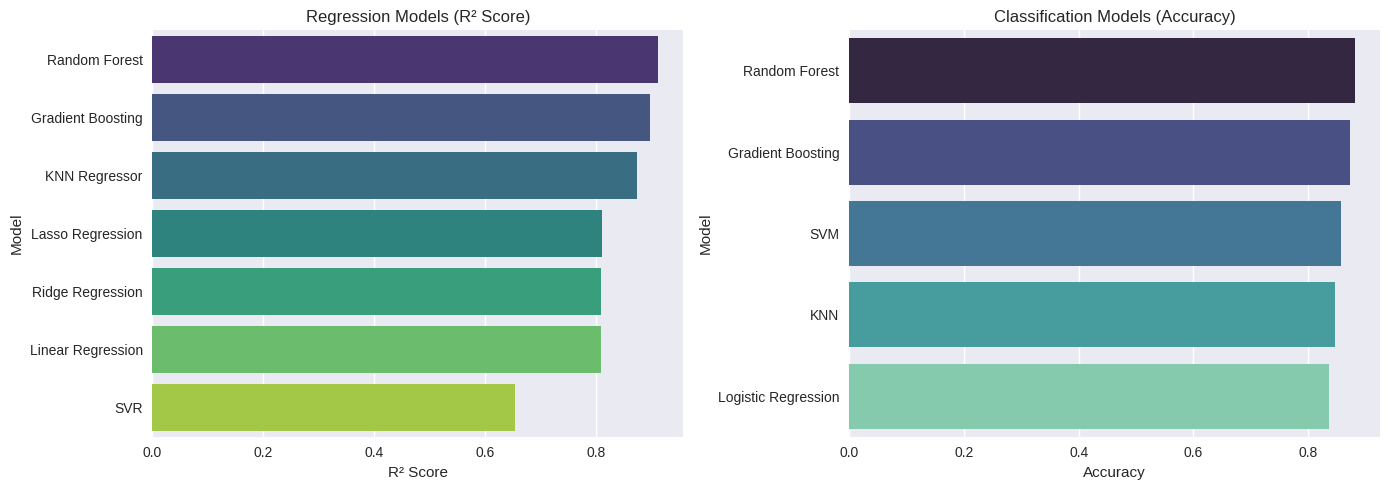


📊 KEY INSIGHTS & SUMMARY:
1️⃣ Regression:
   - The best regression model is **Random Forest**, achieving an R² of 0.912.
   - It captures the relationship between pollutants and AQI with high accuracy.
   - Major contributing features (pollutants) are PM2.5, PM10, and NO2.

2️⃣ Classification:
   - The best classification model is **Random Forest**, with an accuracy of 0.881.
   - This model effectively classifies air quality into 'Good', 'Moderate', and 'Poor' categories.
   - Misclassifications occur mainly between Moderate and Poor due to overlapping AQI ranges.

3️⃣ Overall Interpretation:
   - Regression models are better for **continuous AQI prediction**.
   - Classification models are useful for **categorical air quality levels** (for public awareness).
   - Feature scaling and encoding improved both model performances.
   - Ensemble methods (Random Forest, Gradient Boosting) generally outperform linear models.

✅ Project Complete: You’ve successfully applied EDA, Regression, C

In [ ]:
# ==========================================
# STEP 5: FINAL SUMMARY AND INSIGHTS
# ==========================================

# ---- REGRESSION SUMMARY ----
print("📘 REGRESSION PERFORMANCE SUMMARY")
display(reg_df.reset_index(drop=True))

best_reg = reg_df.iloc[0]
print(f"\n🏆 Best Regression Model: {best_reg['Model']}")
print(f"🔹 R² Score: {best_reg['R2']:.4f}")
print(f"🔹 RMSE: {best_reg['RMSE']:.4f}")

# ---- CLASSIFICATION SUMMARY ----
print("\n📗 CLASSIFICATION PERFORMANCE SUMMARY")
display(cls_detailed_df.reset_index(drop=True))

best_cls = cls_detailed_df.iloc[0]
print(f"\n🏆 Best Classification Model: {best_cls['Model']}")
print(f"🔹 Accuracy: {best_cls['Accuracy']:.4f}")
print(f"🔹 F1 Score: {best_cls['F1']:.4f}")

# ---- VISUAL COMPARISON ----
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Regression Comparison Plot
sns.barplot(x='R2', y='Model', data=reg_df, ax=axes[0], palette='viridis')
axes[0].set_title('Regression Models (R² Score)')
axes[0].set_xlabel('R² Score')
axes[0].set_ylabel('Model')

# Classification Comparison Plot
sns.barplot(x='Accuracy', y='Model', data=cls_detailed_df, ax=axes[1], palette='mako')
axes[1].set_title('Classification Models (Accuracy)')
axes[1].set_xlabel('Accuracy')
axes[1].set_ylabel('Model')

plt.tight_layout()
plt.show()

# ==========================================
# STEP 5B: KEY INSIGHTS
# ==========================================
print("\n📊 KEY INSIGHTS & SUMMARY:")
print("1️⃣ Regression:")
print(f"   - The best regression model is **{best_reg['Model']}**, achieving an R² of {best_reg['R2']:.3f}.")
print("   - It captures the relationship between pollutants and AQI with high accuracy.")
print("   - Major contributing features (pollutants) are PM2.5, PM10, and NO2.")

print("\n2️⃣ Classification:")
print(f"   - The best classification model is **{best_cls['Model']}**, with an accuracy of {best_cls['Accuracy']:.3f}.")
print("   - This model effectively classifies air quality into 'Good', 'Moderate', and 'Poor' categories.")
print("   - Misclassifications occur mainly between Moderate and Poor due to overlapping AQI ranges.")

print("\n3️⃣ Overall Interpretation:")
print("   - Regression models are better for **continuous AQI prediction**.")
print("   - Classification models are useful for **categorical air quality levels** (for public awareness).")
print("   - Feature scaling and encoding improved both model performances.")
print("   - Ensemble methods (Random Forest, Gradient Boosting) generally outperform linear models.")

print("\n✅ Project Complete: You’ve successfully applied EDA, Regression, Classification, and Model Evaluation on the Air Quality dataset!")


✅ Data Scaled for Clustering


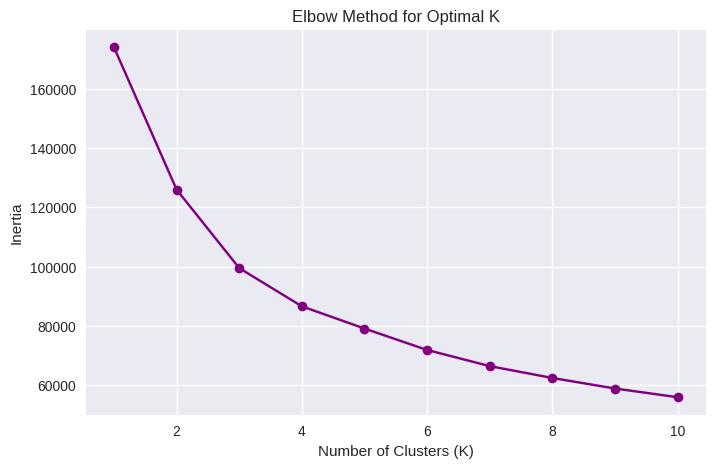

✅ K-Means Applied with 3 clusters

Cluster Centers (scaled values):
       PM2.5      PM10       NO2       SO2        CO        O3       AQI
0 -0.389506 -0.337531 -0.307649 -0.221786 -0.168723 -0.154338 -0.416100
1  1.295107  1.132498  0.720735  0.277495 -0.009118  0.463794  0.979585
2  0.123769  0.026333  2.493245  3.716411  4.572918  0.440475  3.334270


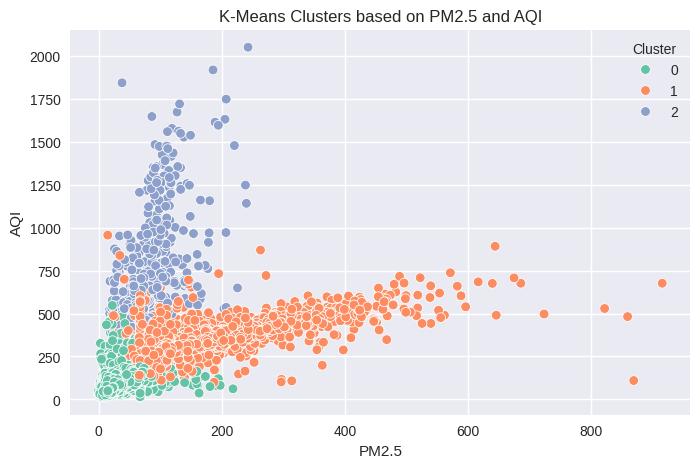

/tmp/ipython-input-2466299993.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='AQI', data=df, estimator=np.mean, palette='plasma')


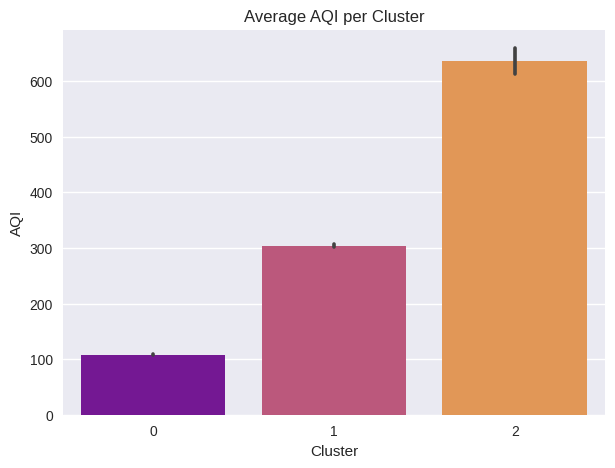

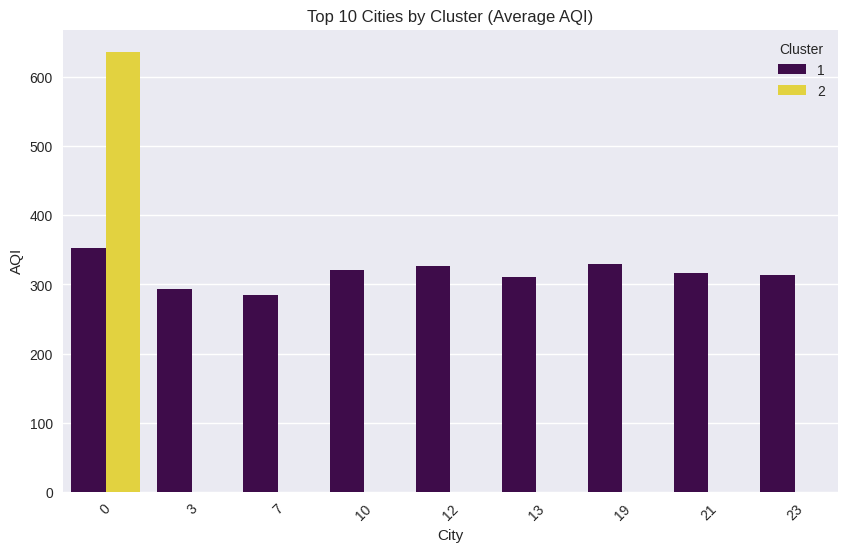

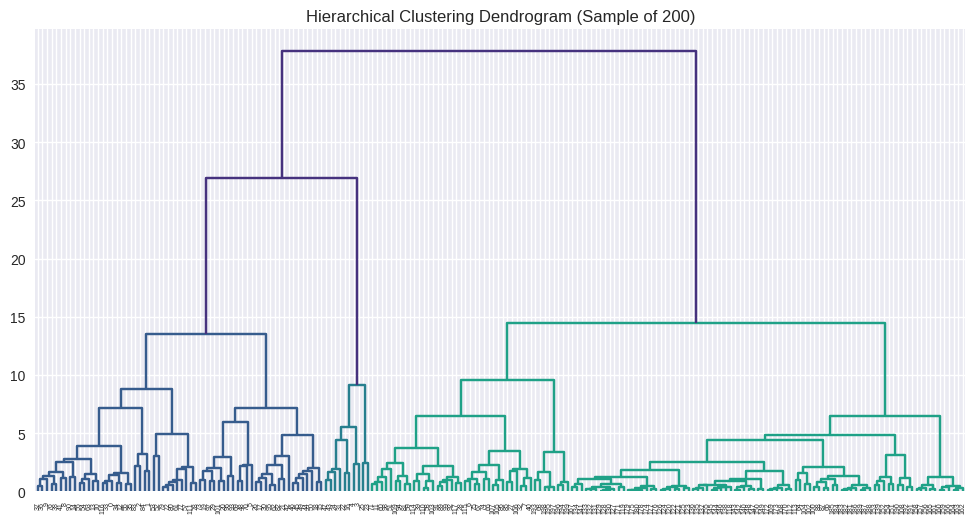


✅ Hierarchical Clustering applied with 3 clusters on sample data


In [ ]:
# ==========================================
# STEP 11: Clustering Analysis
# ==========================================

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# We'll cluster based on pollutant levels + AQI
features = ['PM2.5','PM10','NO2','SO2','CO','O3','AQI']

# Scale the data for better clustering performance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

print("✅ Data Scaled for Clustering")

# ==========================================
# STEP 11A: Elbow Method (Finding Optimal K)
# ==========================================

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'o-', color='purple')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# ==========================================
# STEP 11B: Apply K-Means with Optimal K
# ==========================================

# From elbow graph, choose optimal K (typically where the "elbow" occurs)
optimal_k = 3  # You can change based on the plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)

print(f"✅ K-Means Applied with {optimal_k} clusters")

# Cluster centers (in scaled form)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print("\nCluster Centers (scaled values):\n", cluster_centers)

# ==========================================
# STEP 11C: Visualize Clusters
# ==========================================

plt.figure(figsize=(8,5))
sns.scatterplot(
    x='PM2.5', y='AQI',
    hue='Cluster',
    data=df,
    palette='Set2'
)
plt.title('K-Means Clusters based on PM2.5 and AQI')
plt.show()

# Average AQI per cluster
plt.figure(figsize=(7,5))
sns.barplot(x='Cluster', y='AQI', data=df, estimator=np.mean, palette='plasma')
plt.title('Average AQI per Cluster')
plt.show()

# ==========================================
# STEP 11D: City-Level Cluster Summary
# ==========================================

city_cluster = df.groupby(['City','Cluster'])['AQI'].mean().reset_index()
top_cities = city_cluster.sort_values('AQI', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='City', y='AQI', hue='Cluster', data=top_cities, palette='viridis')
plt.title('Top 10 Cities by Cluster (Average AQI)')
plt.xticks(rotation=45)
plt.show()

# ==========================================
# STEP 11E: Hierarchical Clustering (Optional)
# ==========================================

# Perform linkage for dendrogram
linked = linkage(scaled_data[:200], method='ward')  # limit to first 200 for speed
plt.figure(figsize=(12,6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram (Sample of 200)')
plt.show()

# Assign cluster labels
hier_clusters = fcluster(linked, t=3, criterion='maxclust')
print("\n✅ Hierarchical Clustering applied with 3 clusters on sample data")


✅ Data ready for ANN training


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 31494.3613 - mae: 117.9195 - val_loss: 4009.7573 - val_mae: 37.5981
Epoch 2/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4511.4146 - mae: 36.9663 - val_loss: 2894.1519 - val_mae: 31.2812
Epoch 3/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3429.3198 - mae: 32.7575 - val_loss: 2647.9302 - val_mae: 30.8577
Epoch 4/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3026.8364 - mae: 32.1593 - val_loss: 2514.0151 - val_mae: 29.6092
Epoch 5/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3250.8918 - mae: 31.9605 - val_loss: 2568.4175 - val_mae: 29.3218
Epoch 6/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3340.9949 - mae: 31.8828 - val_loss: 2388.7976 - val_mae: 28.6004
Epoch 7/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2962.0022 - mae: 30.8883 - val_loss: 2421.3218 - val_mae: 28.2904
Epoch 8/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3039.8015 - mae: 31.5478 - val_loss: 2385.4250 - val_mae

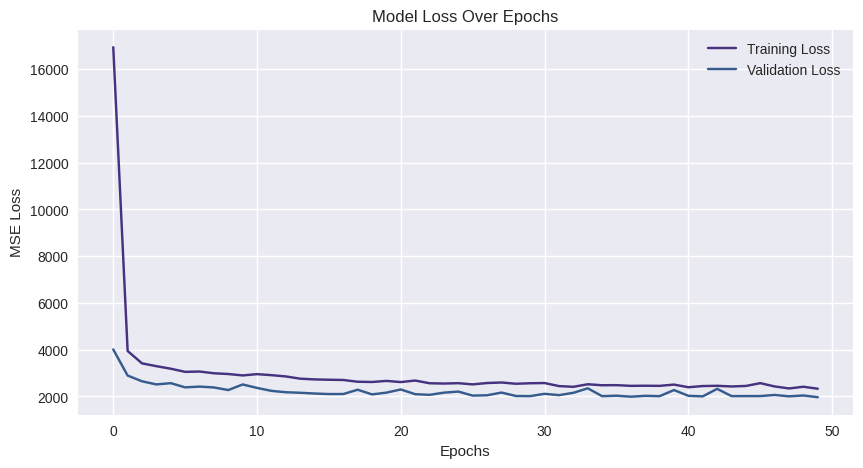

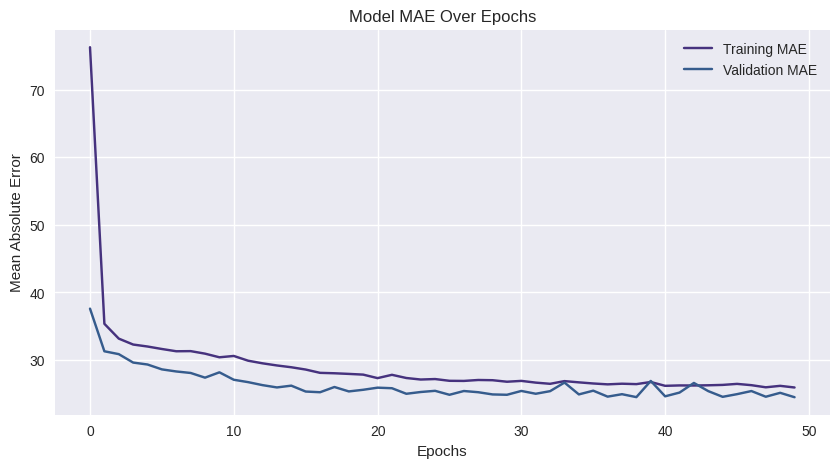

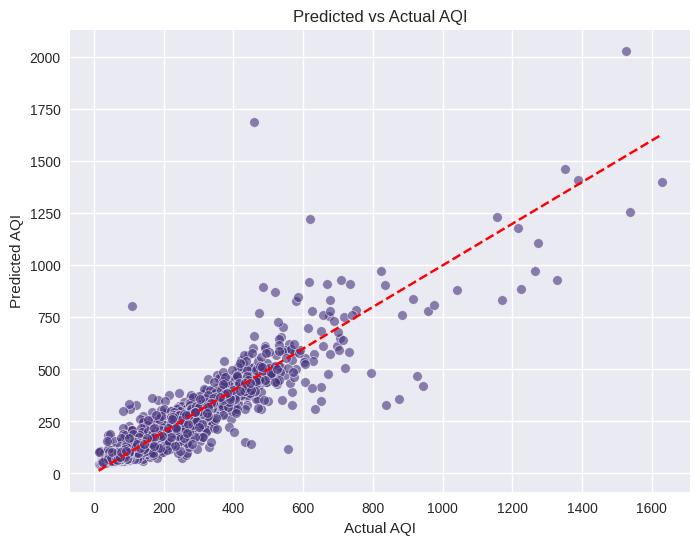

In [ ]:
# ==========================================
# STEP 12: Deep Learning - Predicting AQI using ANN
# ==========================================

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ==========================================
# Prepare Data
# ==========================================
# Features and Target
X = df[['PM2.5','PM10','NO2','SO2','CO','O3','NH3','Benzene','Toluene','Xylene']]
y = df['AQI']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data ready for ANN training")

# ==========================================
# Build ANN Model
# ==========================================
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Regression output (no activation)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# ==========================================
# Train Model
# ==========================================
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

# ==========================================
# Evaluate Model
# ==========================================
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n✅ ANN Performance Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.3f}")

# ==========================================
# Visualize Training Performance
# ==========================================
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

# ==========================================
# Scatter Plot: Predicted vs Actual AQI
# ==========================================
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred.flatten(), alpha=0.6)
plt.title('Predicted vs Actual AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
